In [255]:
import numpy as np
import pandas as pd
import time

Dataset

In [256]:
# X_train = pd.read_csv("X_train.csv")
# Y_train = pd.read_csv("Y_train_4b.csv")
# X_test = pd.read_csv("X_test.csv")
X_train = pd.read_csv("X_train_big.csv")
Y_train = pd.read_csv("Y_train_big.csv")
X_test = pd.read_csv("X_test_big.csv")
Y_test = pd.read_csv("Y_test_big.csv")

In [257]:
# X_train = X_train.drop(columns=['Name'])

In [258]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values


In [259]:
X_train.shape, Y_train.shape, X_test.shape

((29983, 23), (29983, 1), (12, 23))

In [260]:
type(X_train)

numpy.ndarray

In [261]:
# Y_train = np.where(Y_train == 'Yes', 1, np.where(Y_train == 'No', 0, 2))
Y_train = Y_train.ravel()

Normalize

In [262]:
def normalize(X, min, max):
    return 100 * (X - min) / (max - min)

In [263]:
min = np.min(X_train, axis=0)
max = np.max(X_train, axis=0)

X_train = normalize(X_train, min, max)
X_test = normalize(X_test, min, max)

Euclidean Distance

In [264]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

Model

In [265]:
def model(X, Y, X_test, k):

    distances = np.array([euclidean_distance(X_test, x) for x in X])

    reciprocals = np.array([1 /(1 + d) for d in distances])

    weights =  np.array([r / np.sum(reciprocals) for r in reciprocals])

    kth_small = np.sort(distances)[:k].max()
    
    sum_weights = [weights[np.logical_and(Y == i,distances <= kth_small)].sum()\
                for i in range(len(np.unique(Y)))]
    return np.argmax(sum_weights)

Main

In [266]:
classes = np.unique(Y_train)
classes

array([0, 1])

In [ ]:

range_for_k = 18
k_values = [i for i in range(range_for_k) if i % 2 != 0]

manual_time = []
manual_predict = []
index = 0
for x_test_point in X_test:
    index += 1
    start_time = time.time()
    y_pred = [model(X_train, Y_train, x_test_point, k) for k in k_values]
    print(f"Kết quả phân lớp điểm thứ {index} với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:\n",\
        np.array([classes[i] for i in y_pred]))
    end_time = time.time()
    manual_time.append(end_time - start_time)
    manual_predict.append(np.array([classes[i] for i in y_pred]))
    
print(f"Thời gian chạy mô hình tự cài đặt: {sum(manual_time)} giây")


Kết quả phân lớp điểm thứ 1 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 2 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 3 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 4 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [1 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 5 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 6 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [1 1 1 0 0 0 0 0]
Kết quả phân lớp điểm thứ 7 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 8 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 9 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [1 1 1 1 1 1 1 1]
Kết quả phân lớp điểm thứ 10 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [1 1 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 11 với k = 1, 3, 5, 7, 9, 11, 13, 15, 17:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp điểm thứ 12 với k = 1, 3, 5, 7, 9, 

In [282]:
manual_predict

[array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1])]

Sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lưu kết quả dự đoán cho từng giá trị k
predictions = []
sklearn_time = []
index = 0
# Lặp qua từng giá trị k, huấn luyện và dự đoán
for x_test_point in X_test:
    start_time = time.time()
    y_prediction = []
    index += 1
    for k in k_values:
        # Khởi tạo và huấn luyện mô hình KNN với k hiện tại
        knn = KNeighborsClassifier(
            n_neighbors=k, 
            metric='euclidean', 
            weights='distance')
        knn.fit(X_train, Y_train)
        
        # Dự đoán nhãn của tập kiểm tra
        y_prediction.append(knn.predict(x_test_point.reshape(1, -1))[0])
        
    print(f"Kết quả phân lớp của điểm thứ {index} với k = 1, 3, 5, 7, 9, 11:\n",\
        np.array([classes[i] for i in y_prediction]))
    
    predictions.append(np.array([classes[i] for i in y_prediction]))
    end_time = time.time()
    sklearn_time.append(end_time - start_time)
    

print(f"Thời gian chạy mô hình sklearn: {sum(sklearn_time): .4f} giây")

# In kết quả dự đoán


Kết quả phân lớp của điểm thứ 1 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 2 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 3 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 4 với k = 1, 3, 5, 7, 9, 11:
 [1 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 5 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 6 với k = 1, 3, 5, 7, 9, 11:
 [1 1 1 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 7 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 8 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 9 với k = 1, 3, 5, 7, 9, 11:
 [1 1 1 1 1 1 1 1]
Kết quả phân lớp của điểm thứ 10 với k = 1, 3, 5, 7, 9, 11:
 [1 1 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 11 với k = 1, 3, 5, 7, 9, 11:
 [0 0 0 0 0 0 0 0]
Kết quả phân lớp của điểm thứ 12 với k = 1, 3, 5, 7, 9, 11:
 [1 1 1 1 1 1 1 1]
Thời gian chạy mô hình sklearn:  0.9444 giây


In [279]:
predictions

[array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1])]

In [286]:
np.array(Y_test)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1]])

In [292]:
Y_test = np.array(Y_test)
predicted_labels = np.array([pred[0] for pred in predictions])
accuracy = np.mean(predicted_labels == Y_test)
print(f"Độ chính xác của mô hình sklearn: {accuracy * 100:.2f}%")

predicted_labels = np.array([pred[0] for pred in manual_predict])
accuracy = np.mean(predicted_labels == Y_test)
print(f"Độ chính xác của mô hình tự cài đặt: {accuracy * 100:.2f}%")

Độ chính xác của mô hình sklearn: 54.17%
Độ chính xác của mô hình tự cài đặt: 54.17%


Accuracy

In [270]:
import matplotlib.pyplot as plt

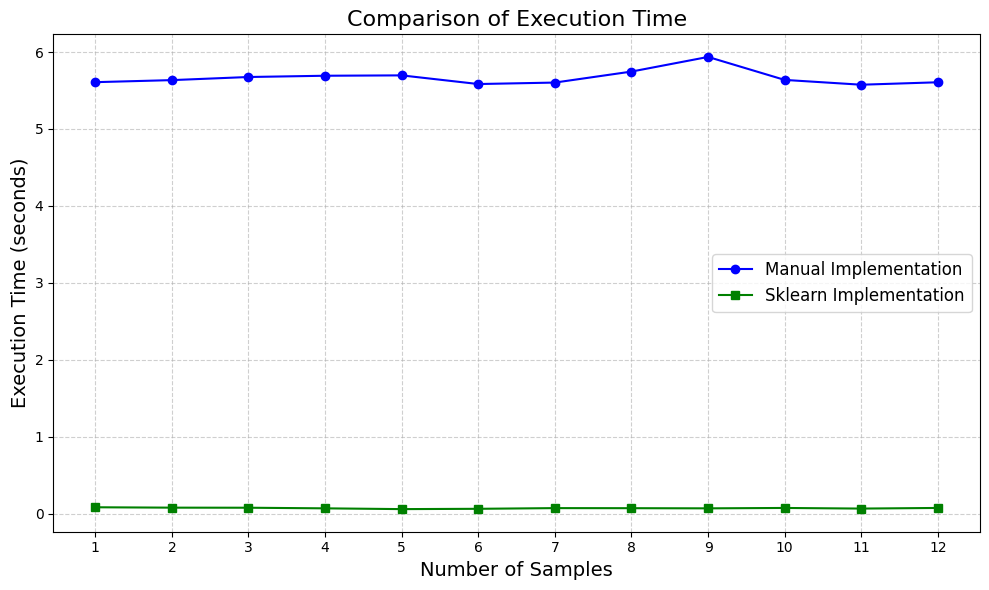

In [271]:
# Dữ liệu mẫu: thời gian thực thi (giả định)
# Thay thế các giá trị này bằng dữ liệu thực tế
n_point = [i+1 for i in range(len(X_test))] 
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Đường biểu diễn thời gian thực thi
plt.plot(n_point, manual_time, marker='o', label='Manual Implementation', color='blue')
plt.plot(n_point, sklearn_time, marker='s', label='Sklearn Implementation', color='green')

# Cấu hình biểu đồ
plt.title('Comparison of Execution Time', fontsize=16)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Execution Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(n_point)  # Hiển thị rõ các điểm mẫu
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


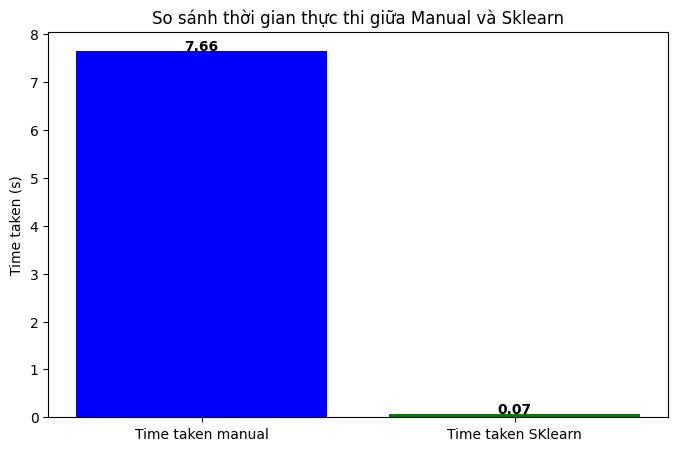

In [272]:
# Tạo dữ liệu cho biểu đồ
scores = [time_taken_manual, time_taken_sklearn]
labels = ['Time taken manual', 'Time taken SKlearn']# Vẽ biểu đồ cột

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Time taken (s)')
plt.title('So sánh thời gian thực thi giữa Manual và Sklearn')

# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(scores):
    plt.text(i, v + 0.0001, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()